### 20/11/20

In [2]:
%matplotlib widget 

ModuleNotFoundError: No module named 'ipympl'

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg


In [22]:
#Constants 
#me=sp.constants.m_e ;
#sp.constants.e;
#sp.constants.hbar; hbar = 1 in all the following
μ_b= 5.8*10**-2 #mev*T-**1
g=2;
k= μ_b*g

In [23]:
#Spin operators for spin = 1/2:
σ_z =(1/2)* np.array([[1,0],[0,-1]]);
σ_x = (1/2)* np.array([[0,1],[1,0]]);
σ_y= (1j/2)*np.array([[0,-1],[1,0]]);

#Spin operator for spin = 1
σ_1z =np.array([[1,0,0],[0,0,0],[0,0,-1]]) ;
σ_1x = (1/np.sqrt(2))* np.array([[0,1,0],[1,0,1],[0,1,0]]);
σ_1y= (1j/np.sqrt(2))*np.array([[0,-1,0],[1,0,-1],[0,1,0]]);


# Zeeman Hamiltonian:  
## $H= -g * \mu_B * B_z * S_z$

In [24]:
#  Zeeman Hamiltonian 
def H(B,σ):
    return -k*B*σ;

In [6]:
Ba=np.linspace(0,10,1000) #range for the Magnetic field

### Zeeman Hamiltonians at different Magnetic fields

In [25]:
H_z =np.array([H(B,σ_z) for B in Ba]); #array of the arrays of the Zeeman Hamiltonian for the spin 1/2 system, at the diferent magnetic fields of Ba.
H_1z =np.array([H(B,σ_1z) for B in Ba]); #array of the arrays of the Zeeman Hamiltonian for the spin 1 system, at the diferent magnetic fields of Ba.

#print(H_z)

In [26]:
def Solv(x):
    """This function uses the built in module of Numpy for diagonalization of matrices """
    la= np.linalg.eig(x)
    En=la[0];
    Vn=la[1];
    return la,En,Vn    

# Diagonalizing the Hamiltonian

In [27]:
la,En,Vn= Solv(H_z); #arrays with the eigen energies and eigen vectors of the Hamiltonian H_z
la1,En1,Vn1= Solv(H_1z); #arrays with the eigen energies and eigen vectors of the Hamiltonian H_1z

Text(0.5, 1.0, 'Eigenenergies for the spin 1/2 Hamiltonian ')

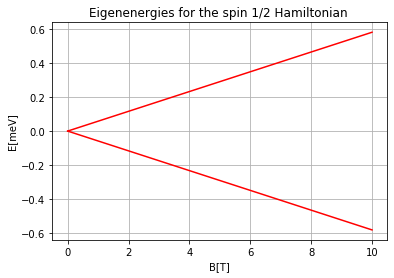

In [29]:
#%matplotlib notebook

fig,ax= plt.subplots()


# Restoring font size.

#matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})

#ax = fig.add_axes([1, 1, 1, 1]) # left, bottom, width, height (range 0 to 1)

ax.grid(True)
#ax.set_xticklabels([r'$-\pi$',r'$\pi$'],  fontsize=18) label='Positive Eigen Energies'

ax.plot(Ba,En,color="red")
ax.set_ylabel('E[meV]')
ax.set_xlabel('B[T]')
ax.set_title('Eigenenergies for the spin 1/2 Hamiltonian ')



### Spin 1/2

### Spin 1

Text(0.5, 1.0, 'Eigenenergies for the spin 1 Hamiltonian ')

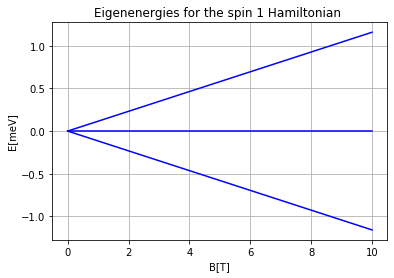

In [30]:
#%matplotlib notebook

fig,ax= plt.subplots()

# Restoring font size.
ax.grid(True)


ax.plot(Ba,En1,color="blue")
ax.set_ylabel('E[meV]')
ax.set_xlabel('B[T]')
ax.set_title('Eigenenergies for the spin 1 Hamiltonian ')
#ax.legend(loc=0) plot of the main data
 

# 0 field Splitting

Now we use the Hamiltonian that includes de 0 field split given by the literature:
$H= -g  \mu_B  B_z  S_z + D * ((S_z )^2 - (1/3)s(s+1) ) + E*((S_x )^2 - (S_y)^2) $

Disregarding the offset term within D:
$H= -g \mu_B B_z  S_z + D (S_z )^2 + E((S_x )^2 - (S_y)^2) $

First we look at $H= -g  \mu_B  B_z  S_z + D  (S_z )^2 $

In [47]:
# Hamiltonian including the 0 field term according to wiki complete version, i.e adding the E term... 
def H0(B,D,s):
    "Hamiltonian of the spin system including the 0 field splitting term with S**2 as developed in https://en.wikipedia.org/wiki/Zero_field_splitting but without the 1/3 term"
    if s == 1/2:
        return (-k*B*σ_z) + D*(np.matmul(σ_z,σ_z) ) 
    if s == 1:
        return (-k*B*(σ_1z)) + ( (D*np.matmul(σ_1z,σ_1z)))

In [49]:
k= -g*μ_b

In [54]:
#arrays for the hamiltonianas at over the range of magnetic fields Ba
H_0z=np.array([H0(B,-1.6,1/2)for B in Ba]); #wikis 1/2
H_1_0 =np.array([H0(B,-1.6,1) for B in Ba]); #array of the arrays of the Zeeman Hamiltonian for the spin 1 system, at the diferent magnetic fields of Ba.


## Diagonalizing the Hamiltonian

In [55]:
#la0,En0,Vn0= Solv(H_0);
la_0,En_0,Vn_0= Solv(H_0z); #wikis hamiltonian, spin=1/2
la1_0,En1_0,Vn1_0= Solv(H_1_0); #wikis hamiltonian, spin=1

In [16]:
#cell just to play with the values of D for the spin 1 system
#H_1_0 =np.array([H0(B,-3,1) for B in Ba]);
#la1_0,En1_0,Vn1_0= Solv(H_1_0); #wikis hamiltonian, spin=1

Text(0.5, 1.0, 'Eigenenergies for the spin 1, 0 Spliting Hamiltonian, D= -1.6  ')

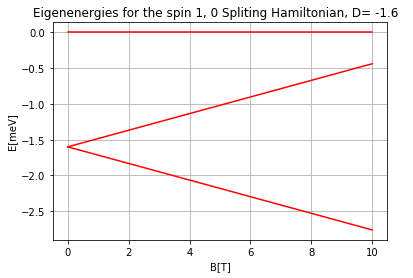

In [56]:


fig,ax= plt.subplots()
ax.grid(True)
#D=-1.6

ax.plot(Ba,En1_0.real,color="red")

ax.set_ylabel('E[meV]')
ax.set_xlabel('B[T]')
ax.set_title('Eigenenergies for the spin 1, 0 Spliting Hamiltonian, D= -1.6  ')
#ax.legend(loc=0) plot of the main data
 

Comparing with the the Hamiltonian that only has the Zeeman term:

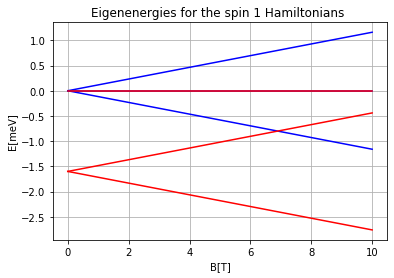

In [60]:


fig,ax= plt.subplots()
ax.grid(True)



ax.plot(Ba,En1,color="blue",label="Zeeman Hamiltonian") 
ax.plot(Ba,En1_0.real,color="red",label="0 field splitting")

ax.set_ylabel('E[meV]')
ax.set_xlabel('B[T]')
ax.set_title('Eigenenergies for the spin 1 Hamiltonians ')
#ax.legend(loc=0) #plot of the main data
fig.savefig('Eigenenergies for the spin 1 Hamiltonians',optimize=True,bbox_inches='tight')

We see that the corresponding D term adds an offset to the $m=\pm 1$eigen energies of the system (red)with respect to only the Zeeman term (blue) it is important to note that the eigen energies for both hamiltonians for the state $m=0$ stays at a constant value $E=0$ (both blue and red line at $E=0$ are overlaped). The sign and magnitude corresponds to the sign and value of D 

 ### Varying the magnitude of D

In [41]:
H_0z=np.array([H0(B,-70,1/2)for B in Ba]); #wikis 1/2
H_1_0 =np.array([H0(B,-70,1) for B in Ba]); #array of the arrays of the Zeeman Hamiltonian for the spin 1 system, at the diferent magnetic fields of Ba.


In [42]:
la_0,En_0,Vn_0= Solv(H_0z); #wikis hamiltonian, spin=1/2
la1_0,En1_0,Vn1_0= Solv(H_1_0); #wikis hamiltonian, spin=1

Text(0.5, 1.0, 'Eigenenergies for the spin 1 Hamiltonian, large D=70 ')

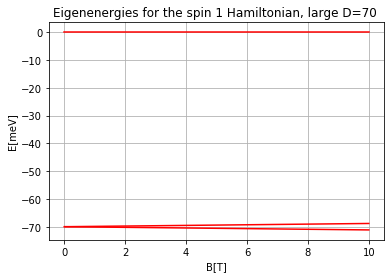

In [43]:


fig,ax= plt.subplots()
ax.grid(True)
#D=70

ax.plot(Ba,En1_0.real,color="red")

ax.set_ylabel('E[meV]')
ax.set_xlabel('B[T]')
ax.set_title('Eigenenergies for the spin 1 Hamiltonian, large D=70 ')
#ax.legend(loc=0) plot of the main data
 

<IPython.core.display.Javascript object>


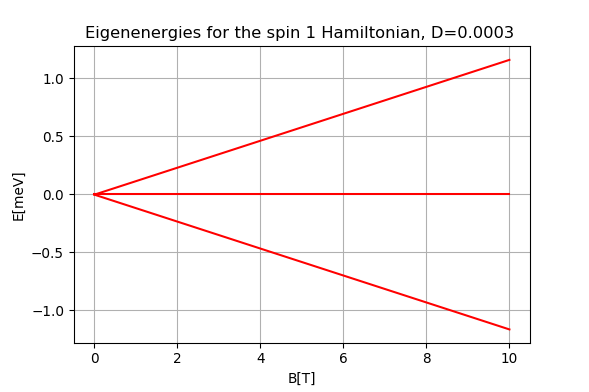

Text(0.5, 1.0, 'Eigenenergies for the spin 1 Hamiltonian, D=0.0003 ')

In [110]:
%matplotlib notebook

fig,ax= plt.subplots()
ax.grid(True)

#D=0.0003

ax.plot(Ba,En1_0.real,color="red")

ax.set_ylabel('E[meV]')
ax.set_xlabel('B[T]')
ax.set_title('Eigenenergies for the spin 1 Hamiltonian, D=0.0003 ')
#ax.legend(loc=0) plot of the main data
 

# "Complete Hamiltonian" 
### We now add the E contribution

### $H= -g \mu_B B_z  S_z + D (S_z )^2 + E((S_x )^2 - (S_y)^2) $

In [44]:
# Hamiltonian including the 0 field term according to literature complete version, i.e adding the E term...
def H0(B,D,E,s):
    "Hamiltonian of the spin system including the 0 field splitting            term with S**2 as developed in https://en.wikipedia.org/wiki/Zero_field_splitting "
    if s == 1/2:
        return (-k*B*σ_z) + D*(np.matmul(σ_z,σ_z) ) + (E* np.matmul(σ_x,σ_x) - E*np.matmul(σ_y,σ_y))
    if s == 1:
        return (-k*B*(σ_1z)) +  (D*np.matmul(σ_1z,σ_1z)  )  + (E* np.matmul(σ_1x,σ_1x) - E * np.matmul(σ_1y,σ_1y))

In [21]:
H_1_0 = np.array( [H0(B,-1.6,0.8,1) for B in Ba   ]);
#H_0z=np.array([H0(B,-5,0,1/2)for B in Ba]); #wikis 1/2
#la_0,En_0,Vn_0= Solv(H_0z); #wikis hamiltonian, spin=1/2
la1_0 , En1_0, Vn1_0 = Solv(H_1_0)

<IPython.core.display.Javascript object>


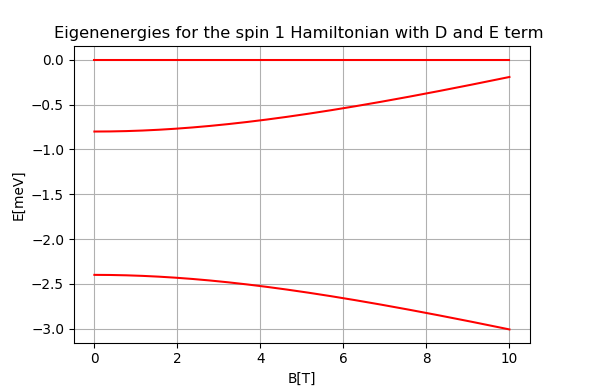

In [22]:
%matplotlib notebook
#D=-1.6
#E=0.8
fig,ax= plt.subplots()
ax.grid(True)

ax.plot(Ba,En1_0.real,color="red")

ax.set_ylabel('E[meV]')
ax.set_xlabel('B[T]')
ax.set_title('Eigenenergies for the spin 1 Hamiltonian with D and E term ')
#ax.legend(loc=0) plot of the main data
fig.savefig('Complete_Hamiltonian_spin_1',optimize=True,bbox_inches='tight')

## Thank you!


In [102]:
k= μ_b*g

### $H= -g \mu_B B_z  S_z + D (S_z )^2 + E((S_x )^2 - (S_y)^2) $

## D=0

In [108]:
# Hamiltonian including the 0 field term according to literature complete version, i.e adding the E term...
def H0(B,D,E):
    "Hamiltonian of the spin system including the 0 field splitting            term with S**2 as developed in https://en.wikipedia.org/wiki/Zero_field_splitting "
    return (-k*B*(σ_1z)) +  ( D*np.matmul(σ_1z,σ_1z)  )  +  (E*(  np.matmul(σ_1x,σ_1x) - np.matmul(σ_1y,σ_1y) ) )

In [63]:
#Spin operators for spin = 1/2:
σ_z =(1/2)* np.array([[1,0],[0,-1]]);
σ_x = (1/2)* np.array([[0,1],[1,0]]);
σ_y= (1j/2)*np.array([[0,-1],[1,0]]);

#Spin operator for spin = 1
σ_1z =np.array([[1,0,0],[0,0,0],[0,0,-1]]) ;
σ_1x = (1/np.sqrt(2))* np.array([[0,1,0],[1,0,1],[0,1,0]]);
σ_1y= (1j/np.sqrt(2))*np.array([[0,-1,0],[1,0,-1],[0,1,0]]);


In [103]:
H_1_0 = np.array( [H0(B,0,-4) for B in Ba   ]);
la1_0,En1_0,Vn1_0 = Solv(H_1_0)

<IPython.core.display.Javascript object>


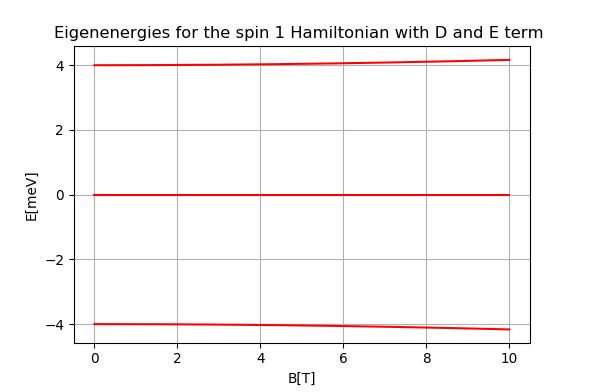

In [80]:
%matplotlib notebook
fig,ax= plt.subplots()
ax.grid(True)

ax.plot(Ba,En1_0.real,color="red")

ax.set_ylabel('E[meV]')
ax.set_xlabel('B[T]')
ax.set_title('Eigenenergies for the spin 1 Hamiltonian with D and E term ')
#ax.legend(loc=0) plot of the main data
fig.savefig('Complete_Hamiltonian_spin_1_4',optimize=True,bbox_inches='tight')

## Different values of E

In [40]:
H_1_0 = np.array( [H0(B,0,0.001,1) for B in Ba   ]);
la1_0,En1_0,Vn1_0 = Solv(H_1_0)

<IPython.core.display.Javascript object>


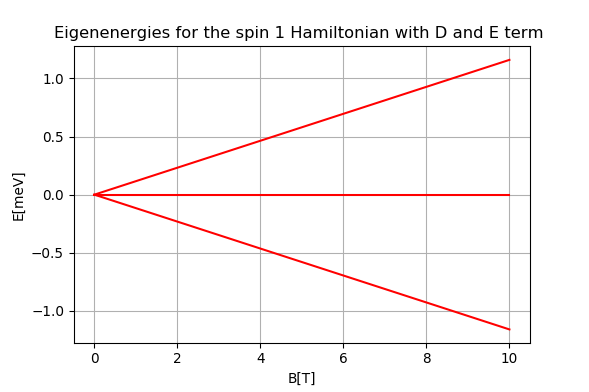

In [41]:
%matplotlib notebook
fig,ax= plt.subplots()
ax.grid(True)

ax.plot(Ba,En1_0.real,color="red")

ax.set_ylabel('E[meV]')
ax.set_xlabel('B[T]')
ax.set_title('Eigenenergies for the spin 1 Hamiltonian with D and E term ')
#ax.legend(loc=0) plot of the main data
fig.savefig('Complete_Hamiltonian_spin_1_10',optimize=True,bbox_inches='tight')

In [85]:
np.matmul(σ_1x,σ_1x)

array([[0.5, 0. , 0.5],
       [0. , 1. , 0. ],
       [0.5, 0. , 0.5]])

In [86]:
np.matmul(σ_1y,σ_1y)

array([[ 0.5+0.j,  0. +0.j, -0.5+0.j],
       [ 0. +0.j,  1. +0.j,  0. +0.j],
       [-0.5+0.j,  0. +0.j,  0.5+0.j]])

In [90]:
 np.matmul(σ_1x,σ_1x) -  np.matmul(σ_1y,σ_1y)

array([[0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j]])

In [91]:
np.matmul(σ_1z,σ_1z)

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 1]])

In [118]:
H_1_0 = np.array( [H0(B,0,1.17,1) for B in Ba   ]);
la1_0,En1_0,Vn1_0 = Solv(H_1_0)

<IPython.core.display.Javascript object>


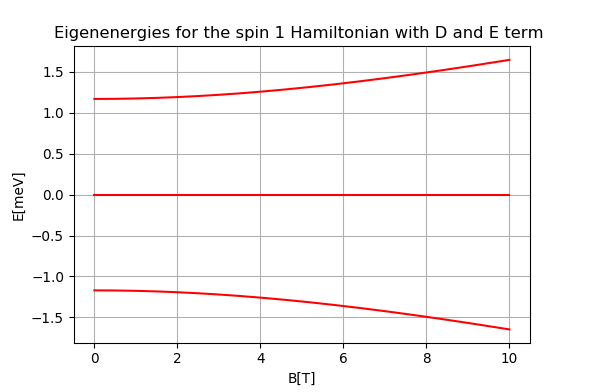

In [119]:
%matplotlib notebook
fig,ax= plt.subplots()
ax.grid(True)
#E=1.17
ax.plot(Ba,En1_0.real,color="red")

ax.set_ylabel('E[meV]')
ax.set_xlabel('B[T]')
ax.set_title('Eigenenergies for the spin 1 Hamiltonian with D and E term ')
#ax.legend(loc=0) plot of the main data
fig.savefig('Complete_Hamiltonian_spin_1_1_17',optimize=True,bbox_inches='tight')

# $\lambda(B) = \sqrt{{kB}^2 +E^2}$

In [72]:
def lamb(x,e):
    return np.sqrt((k*x)**2 + e**2 )

In [92]:
#lombdas=  np.array( [lamb(B,1.17)  for B in Ba   ]);
lombdos=  np.array( [lamb(B,50)  for B in Ba   ])

<IPython.core.display.Javascript object>


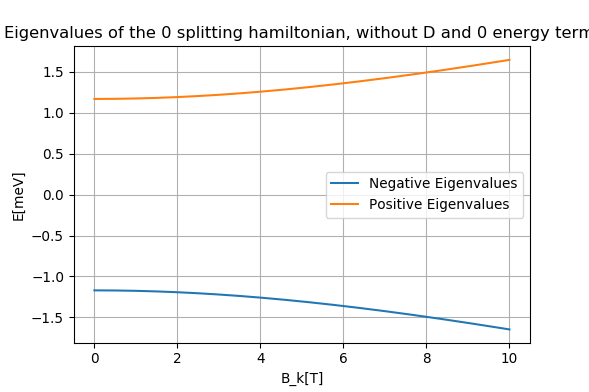

In [78]:
%matplotlib notebook
fig,ax= plt.subplots()
ax.grid(True)

ax.plot(Ba,-lombdas,label='Negative Eigenvalues')
ax.plot(Ba,lombdas,label='Positive Eigenvalues')

ax.set_ylabel('E[meV]');
ax.set_xlabel('B[T]');
ax.set_title('Eigenvalues of the 0 splitting hamiltonian, without D and 0 energy term ')
ax.legend(loc=0) 
fig.savefig('eigenvalues_wo0_d_1_17',optimize=True,bbox_inches='tight')

<IPython.core.display.Javascript object>


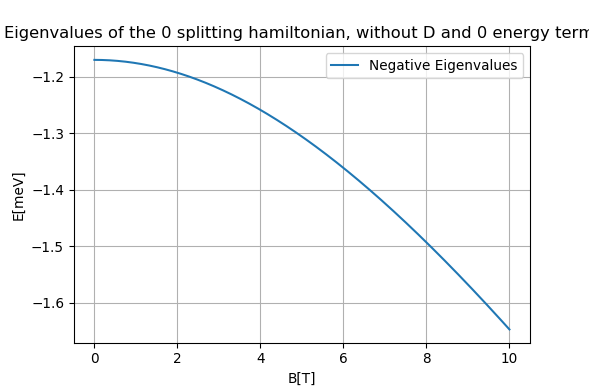

In [83]:
%matplotlib notebook
fig,ax= plt.subplots()
ax.grid(True)

ax.plot(Ba,-lombdas,label='Negative Eigenvalues')
#ax.plot(Ba,lombdas,label='Positive Eigenvalues')

ax.set_ylabel('E[meV]');
ax.set_xlabel('B[T]');
ax.set_title('Eigenvalues of the 0 splitting hamiltonian, without D and 0 energy term ')
ax.legend(loc=0) 
#fig.savefig('eigenvalues_wo0_d_1_17',optimize=True,bbox_inches='tight')

<IPython.core.display.Javascript object>


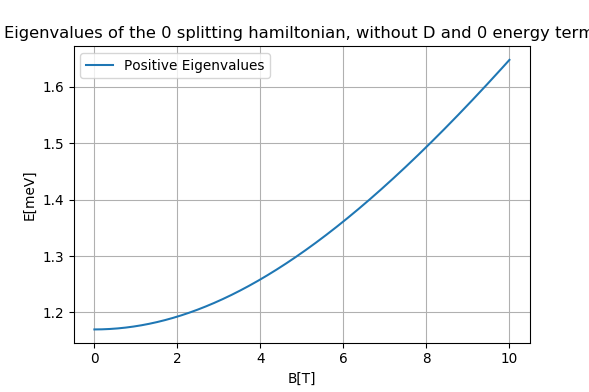

In [84]:
%matplotlib notebook
fig,ax= plt.subplots()
ax.grid(True)

#ax.plot(Ba,-lombdas,label='Negative Eigenvalues')
ax.plot(Ba,lombdas,label='Positive Eigenvalues')

ax.set_ylabel('E[meV]');
ax.set_xlabel('B[T]');
ax.set_title('Eigenvalues of the 0 splitting hamiltonian, without D and 0 energy term ')
ax.legend(loc=0) 
#fig.savefig('eigenvalues_wo0_d_1_17',optimize=True,bbox_inches='tight')

In [93]:
#lombdas=  np.array( [lamb(B,1.17)  for B in Ba   ]);
lombdos=  np.array( [lamb(B,50)  for B in Ba   ])

<IPython.core.display.Javascript object>


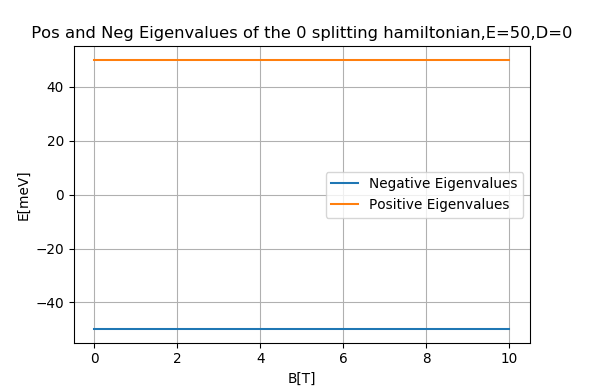

In [95]:
%matplotlib notebook
fig,ax= plt.subplots()
ax.grid(True)

ax.plot(Ba,-lombdos,label='Negative Eigenvalues')
ax.plot(Ba,lombdos,label='Positive Eigenvalues')

ax.set_ylabel('E[meV]');
ax.set_xlabel('B[T]');
ax.set_title(' Pos and Neg Eigenvalues of the 0 splitting hamiltonian,E=50,D=0 ')
ax.legend(loc=0) 
fig.savefig('eigenvalues_wo0_d_50',optimize=True,bbox_inches='tight')

In [120]:
H_1_0 = np.array( [H0(B,-2,1.8,1) for B in Ba   ]);
la1_0,En1_0,Vn1_0 = Solv(H_1_0)

<IPython.core.display.Javascript object>


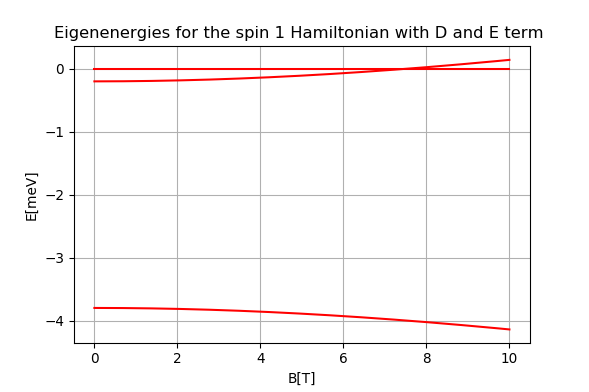

In [121]:
%matplotlib notebook
fig,ax= plt.subplots()
ax.grid(True)
#D=-2.
#E=1.8
ax.plot(Ba,En1_0.real,color="red")

ax.set_ylabel('E[meV]')
ax.set_xlabel('B[T]')
ax.set_title('Eigenenergies for the spin 1 Hamiltonian with D and E term ')
#ax.legend(loc=0) plot of the main data
fig.savefig('Complete_Hamiltonian_spin_1_D_E_negD',optimize=True,bbox_inches='tight')

In [124]:
H_1_0 = np.array( [H0(B,2,1.8,1) for B in Ba   ]);
la1_0,En1_0,Vn1_0 = Solv(H_1_0)

<IPython.core.display.Javascript object>


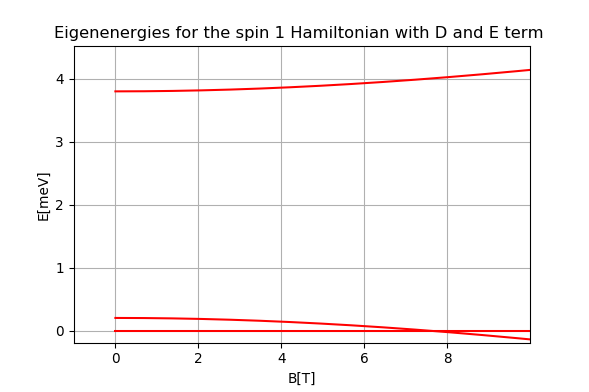

In [125]:
%matplotlib notebook
fig,ax= plt.subplots()
ax.grid(True)
#D=-2.
#E=1.8
ax.plot(Ba,En1_0.real,color="red")

ax.set_ylabel('E[meV]')
ax.set_xlabel('B[T]')
ax.set_title('Eigenenergies for the spin 1 Hamiltonian with D and E term ')
#ax.legend(loc=0) plot of the main data
fig.savefig('Complete_Hamiltonian_spin_1_D_E_posD',optimize=True,bbox_inches='tight')